# Validate Mexico ShapeFiles

@roman 

8 June, 2024

In [2]:
import pandas as pd
import geopandas as gpd


---
# Manual Data

## Mexico States

In [4]:
# read data
file = "../../data/catalogues/mexico_shapes/Entidades_Federativas"
gdf_mexico_states = gpd.read_file(file)

# look
gdf_mexico_states.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."


<Axes: >

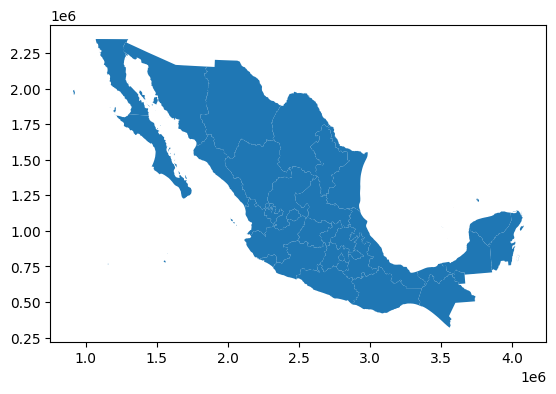

In [5]:
# plot
gdf_mexico_states.plot()

## Mexico Municipalities

In [6]:
# read
file = "../../data/catalogues/mexico_shapes/muni_2018gw"
gdf_mexico_mun = gpd.read_file(file)

# look
gdf_mexico_mun.head()

,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry
0,01,001,01001,Aguascalientes,116635.92455,1166.35925,Aguascalientes,0,1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01,002,01002,Aguascalientes,54337.42654,543.37427,Asientos,1,2,"POLYGON ((-101.99941 22.21951, -101.99940 22.2..."
2,01,003,01003,Aguascalientes,92335.78320,923.35783,Calvillo,2,3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01,004,01004,Aguascalientes,12838.35453,128.38355,CosÃ­o,3,4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3..."
4,01,005,01005,Aguascalientes,49989.50926,499.89509,JesÃºs MarÃ­a,4,5,"POLYGON ((-102.31034 22.03716, -102.30653 22.0..."


<Axes: >

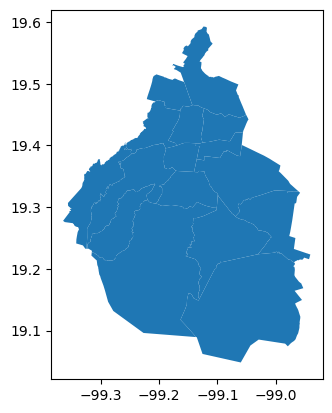

In [7]:
# plot
gdf_mexico_mun.query("CVE_ENT == '09'").plot()

## Mexico Lakes and Rivers (ill)

In [9]:
# file
file = "../../data/catalogues/mexico_shapes/cuerpos_agua4m"
gdf_mexico_water_bodies = gpd.read_file(file, crs="EPSG:4326")

# convert to CRS 6372
gdf_mexico_water_bodies = gdf_mexico_water_bodies.to_crs("EPSG:6372")

# look
gdf_mexico_water_bodies.head()

,AREA,PERIMETER,CA_GEO_,CA_GEO_ID,NOMBRE,SYMBOL,geometry
0,0.00574,0.38966,2,1,Laguna Salada,5,"POLYGON ((1205526.820 2335079.227, 1206137.149..."
1,0.00433,0.37210,3,2,P. Angostura,4,"POLYGON ((1790944.090 2078765.874, 1791478.788..."
2,0.01347,0.88760,4,3,P. La Amistad,4,"POLYGON ((2570165.605 1946591.746, 2570763.163..."
3,0.00849,0.63219,5,4,P. Plutarco E. Calles,4,"POLYGON ((1748019.725 1931961.480, 1748630.597..."
4,0.00122,0.13128,6,5,P. Abelardo L. Rodriguez,4,"POLYGON ((1631962.632 1912458.949, 1631350.602..."


In [11]:
# plot
gdf_mexico_water_bodies.explore()

note: this file is ill

---
# InegiPy

## Config

In [19]:
from INEGIpy import Indicadores
from datetime import datetime
from dotenv import load_dotenv
import os

In [49]:
# load environment variables
load_dotenv()

True

In [20]:
# inegi class
inegi_api = Indicadores(token=os.getenv('API_INEGI'))

## Example

In [22]:
# get inpc
df_inpc = inegi_api.obtener_df(
    indicadores = '628194',
    nombres = 'inpc',
    inicio="2024-01-01",
    )
# change the name of the index
df_inpc.index.name = 'date'
df_inpc

/Users/ravj/opt/anaconda3/envs/dd3/lib/python3.10/site-packages/INEGIpy/_indicadores.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.set_index(pd.to_datetime(df.fechas),inplace=True, drop=True)


,inpc
date,
2024-01-01,133.555
2024-02-01,133.681
2024-03-01,134.065
2024-04-01,134.336
2024-05-01,134.087


In [25]:
# see catalogues
inegi_api.catalogo_indicadores

Signature: inegi_api.catalogo_indicadores(banco: str, indicador: str = None)
Docstring:
Regresa un DataFrame con la descripción de algunos o todos los indicadores de un banco. 

Parametros
-----------
banco: str. ['BIE' | 'BISE'] Define el banco al cual pertenecen los indicadores. Puede ser el Banco de Indicadores Económicos (BISE) o el Banco de Información Económica (BIE).
indicador: str, opcional. Clave del indicador a consultar. En caso de no definirse se regresan todos los indicadores del banco.
----------

Para más información visitar https://www.inegi.org.mx/servicios/api_indicadores.html
File:      ~/opt/anaconda3/envs/dd3/lib/python3.10/site-packages/INEGIpy/_indicadores.py
Type:      method

In [37]:
inegi_api.catalogo_indicadores('BIE')

KeyError: 'CODE'

In [36]:
inegi_api.catalogo_indicadores('BISE')

,value,Description
0,472079,Total nacional
1,472112,Total nacional
2,472145,Total nacional
3,472178,Total nacional
4,472211,Total nacional
...,...,...
31273,8999999704,56 Servicios de apoyo a los negocios y manejo ...
31274,8999999707,71 Servicios de esparcimiento culturales y dep...
31275,8999999710,53 Servicios inmobiliarios y de alquiler de bi...
31276,8999999711,"54 Servicios profesionales, científicos y tecn..."


## National Geostatistical Framework


In [38]:
from INEGIpy import MarcoGeoestadistico

In [39]:
# define class (as the vignette)
marco = MarcoGeoestadistico()

### States

<Axes: >

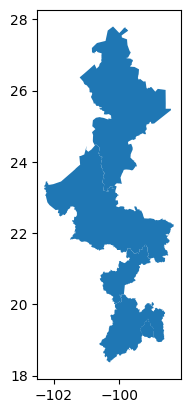

In [40]:
# see some states
edos = marco.Entidades(nombres = ['ciudad de méxico','méxico','querétaro','san luis','nuevo león'])
edos.plot()

In [73]:
edos.head()

,geometry,cvegeo,cve_agee,nom_agee,nom_abrev,pob,pob_fem,pob_mas,viv
0,"MULTIPOLYGON (((-99.12215 19.59248, -99.12078 ...",09,09,Ciudad de México,CDMX,9209944,4805017,4404927,2757433
1,"MULTIPOLYGON (((-99.12215 19.59248, -99.12078 ...",09,09,Ciudad de México,CDMX,9209944,4805017,4404927,2757433
2,"MULTIPOLYGON (((-99.91237 20.28563, -99.91180 ...",15,15,México,Mex.,16992418,8741123,8251295,4569533
3,"MULTIPOLYGON (((-99.18811 21.66992, -99.18362 ...",22,22,Querétaro,Qro.,2368467,1211647,1156820,668771
4,"MULTIPOLYGON (((-100.68522 24.46974, -100.6422...",24,24,San Luis Potosí,SLP,2822255,1449804,1372451,775016


### Municipalities

In [43]:
nl_municipios = marco.Municipios(entidades='19')
nl_municipios.head(10)

,geometry,cvegeo,cve_agee,cve_agem,nom_agem,cve_cab,pob,pob_fem,pob_mas,viv
0,"MULTIPOLYGON (((-100.38700 25.79729, -100.3851...",19039,19,039,Monterrey,0001,1142994,578189,564805,329095
1,"MULTIPOLYGON (((-100.72391 25.95274, -100.7206...",19018,19,018,García,0001,397205,196497,200708,114900
2,"MULTIPOLYGON (((-100.25392 25.87915, -100.2535...",19006,19,006,Apodaca,0001,656464,324951,331513,181728
3,"MULTIPOLYGON (((-99.80208 25.99558, -99.80198 ...",19016,19,016,Doctor González,0001,3256,1584,1672,1029
4,"MULTIPOLYGON (((-99.54189 24.03365, -99.54092 ...",19024,19,024,General Zaragoza,0001,6282,3058,3224,1657
5,"MULTIPOLYGON (((-100.36961 25.98211, -100.3690...",19010,19,010,El Carmen,0001,104478,51595,52883,30044
6,"MULTIPOLYGON (((-98.81822 26.04704, -98.80970 ...",19020,19,020,General Bravo,0001,5506,2710,2796,1759
7,"MULTIPOLYGON (((-100.42498 25.71484, -100.4235...",19019,19,019,San Pedro Garza García,0001,132169,69583,62586,37754
8,"MULTIPOLYGON (((-100.46376 25.89837, -100.4580...",19021,19,021,General Escobedo,0001,481213,239052,242161,131741
9,"MULTIPOLYGON (((-100.50686 25.75002, -100.4987...",19048,19,048,Santa Catarina,0001,306322,153705,152617,82925


### Ageb

<Axes: >

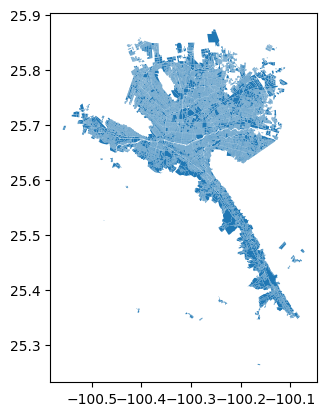

In [44]:
muns = ['021','039','046','048','049','019','026','006'] #claves de municipios correspondientes a la Zona Metropolitana de Monterrey
zmmty_manzanas = marco.Manzanas(entidades = '19', municipios = muns)
zmmty_manzanas.plot()

In [45]:
zmmty_manzanas.head()

,geometry,cve_agee,nom_agee,cve_agem,nom_agem,cve_loc,nom_loc,cve_ageb,cve_mza,ambito,tipomza,cvegeo,pobtot,pobmas,pobfem,tvivhab
0,"MULTIPOLYGON (((-100.28064 25.78083, -100.2804...",19,Nuevo León,021,General Escobedo,0001,Ciudad General Escobedo,1817,027,Urbana,Típica,1902100011817027,NaN,NaN,NaN,NaN
1,"MULTIPOLYGON (((-100.41063 25.80177, -100.4101...",19,Nuevo León,021,General Escobedo,0001,Ciudad General Escobedo,1785,005,Urbana,Típica,1902100011785005,0.0,0.0,0.0,0.0
2,"MULTIPOLYGON (((-100.39896 25.84755, -100.3982...",19,Nuevo León,021,General Escobedo,0001,Ciudad General Escobedo,1766,012,Urbana,Típica,1902100011766012,0.0,0.0,0.0,0.0
3,"MULTIPOLYGON (((-100.39710 25.84876, -100.3990...",19,Nuevo León,021,General Escobedo,0001,Ciudad General Escobedo,1766,011,Urbana,Típica,1902100011766011,333.0,176.0,157.0,90.0
4,"MULTIPOLYGON (((-100.39734 25.84908, -100.3992...",19,Nuevo León,021,General Escobedo,0001,Ciudad General Escobedo,1766,009,Urbana,Típica,1902100011766009,348.0,163.0,185.0,96.0


### Roads

In [46]:
mty_vialidades = marco.Vialidades(entidades='19',municipios='039')
mty_vialidades.head()

,geometry,cvegeo,cve_agee,cve_agem,cve_loc,cve_via,nomvial,tipovial,ambito,sentido
0,"MULTILINESTRING ((-100.37921 25.77703, -100.37...",190390001,19,039,0001,10523,Canal de Aztlán,Calle,Urbana,Dos sentidos
1,"MULTILINESTRING ((-100.24432 25.51150, -100.24...",190390001,19,039,0001,04897,El Barro,Calle,Urbana,Dos sentidos
2,"MULTILINESTRING ((-100.39648 25.76720, -100.39...",190390001,19,039,0001,10621,Almanzora,Calle,Urbana,Dos sentidos
3,"MULTILINESTRING ((-100.38965 25.77122, -100.38...",190390001,19,039,0001,14309,Paseo de la Reserva,Calle,Urbana,Dos sentidos
4,"MULTILINESTRING ((-100.36222 25.77592, -100.36...",190390001,19,039,0001,09818,15 de Abril,Privada,Urbana,Dos sentidos


<Axes: >

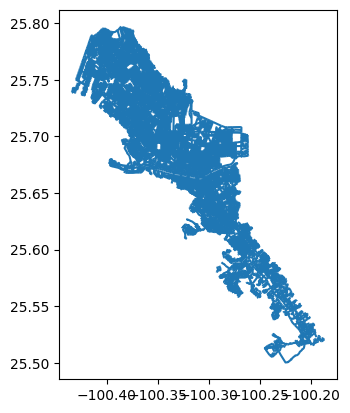

In [47]:
# plot
mty_vialidades.plot()

## Denue

In [48]:
from INEGIpy import DENUE

In [56]:
# inegi class
denue = DENUE(token=os.getenv('API_INEGI'))

In [72]:
df = denue_api.Buscar('papeleria', latitud = 19.32593, longitud = -99.17253, distancia = 3_000)
df.explore()

In [58]:
df = denue.Ficha(clave = '993591', as_geodf=False)
display(df)

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,CentroComercial,TipoCentroComercial,NumLocal
0,09003465311009331000000000U4,993591,PAPELERIA COPY PLUS,,Comercio al por menor de artículos de papelería,0 a 5 personas,CALLE,DALIAS,351,,...,"COYOACÁN, Coyoacán, CIUDAD DE MÉXICO",,COPYPLUS@LIVE.COM.MX,,Fijo,-99.17327717,19.32546362,,,


In [59]:
df = denue.Cuantificar(clave_area = '09003', clave_actividad = ['464111', '464112'], estrato= '1') #farmacias con y sin minisuper en Coyoacán
display(df)

,AE,AG,Total
0,464111,09003,306
1,464112,09003,46


## Routes

In [65]:
from INEGIpy import Ruteo
ruteo = Ruteo(token=os.getenv('API_INEGI_RUTEO'))

In [66]:
combustibles = ruteo.Combustibles()
display(combustibles)

,tipo,tipo_costo,costo
0,Regular,Regular $23.319,23.319
1,Premium,Premium $25.100,25.100
2,Diésel,Diésel $24.979,24.979
3,Gas,Gas $12.709,12.709


In [67]:
destino_inicial = ruteo.BuscarDestino(busqueda = 'palacio de bellas artes, ciudad de m', cantidad = 1)
destino_final = ruteo.BuscarDestino(busqueda = 'zócalo, ciudad de m', cantidad = 1)
display(destino_inicial)
display(destino_final)

,ent_abr,id_dest,nombre,geometry
0,CDMX,5961,"Palacio de Bellas Artes, Cuauhtémoc",POINT (-99.14137 19.43524)


,ent_abr,id_dest,nombre,geometry
0,CDMX,8084,"Plaza de la Constitución, Cuauhtémoc",POINT (-99.13320 19.43263)


In [68]:
linea_inicial = ruteo.BuscarLinea(lat = 19.435237353, lng = -99.141374223) # equvalente a buscar bellas artes pero con las coordenadas
linea_final = ruteo.BuscarLinea(lat = 19.4326290000001, lng = -99.133203) # equivalente a buscar zócalo con las coordenadas
display(linea_inicial)
display(linea_final)

,source,id_routing_net,nombre,target,geometry
0,350503,666977,Eje vial Central Lázaro Cárdenas,1181429,POINT (-99.14070 19.43514)


,source,id_routing_net,nombre,target,geometry
0,986650,1619,Calle Plaza de la Constitución,986651,POINT (-99.13327 19.43193)


In [69]:
ruta_optima = ruteo.CalcularRuta(linea_inicial = linea_inicial, linea_final = linea_final, tipo_vehiculo = 1, ruta = 'optima')

# Las siguientes combinaciones serían equivalentes:
#ruteo.CalcularRuta(linea_inicial = linea_inicial, destino_final = destino_final, tipo_vehiculo = 1, ruta = 'optima')
#ruteo.CalcularRuta(destino_inicial = destino_inicial, linea_final = linea_final, tipo_vehiculo = 1, ruta = 'optima')
#ruteo.CalcularRuta(destino_inicial = destino_inicial, destino_final = destino_final, tipo_vehiculo = 1, ruta = 'optima')

display(ruta_optima)

,costo_caseta,tiempo_min,advertencia,long_km,peaje,geometry
0,0.0,4.25,,2.28,False,"MULTILINESTRING ((-99.14084 19.43424, -99.1407..."


In [71]:
ruta_optima.explore()